# **Importing, Downloading and Installing Libraries**

In [1]:
!pip install vaderSentiment
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import numpy as np
import statistics
from scipy import stats
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Cleaning and Perprocessing**

##Cleaning

In [2]:

#Reading the data set CSV file.
hotels = pd.read_csv("Hotel_Reviews.csv")
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
#Checking for missing data
print("Number of missing values before cleaning:\n", hotels.isnull().sum())
print(hotels.shape)

Number of missing values before cleaning:
 Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64
(515738, 17)


In [4]:
#Droping the misssing longitude and lattitude
hotels_cleaned = hotels.dropna(subset=['lat', 'lng'])

In [5]:
#Checking for missing data
print("Number of missing values before cleaning:\n", hotels_cleaned.isnull().sum())
print(hotels_cleaned.shape)

Number of missing values before cleaning:
 Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64
(512470, 17)


In [6]:
#Convert the Review_Date format to DateTime format.
hotels_cleaned['Review_Date'] = pd.to_datetime(hotels_cleaned['Review_Date'])

C:\Users\sachin\AppData\Local\Temp\ipykernel_15604\1662516896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_cleaned['Review_Date'] = pd.to_datetime(hotels_cleaned['Review_Date'])


## Removing Outliers

C:\Users\sachin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


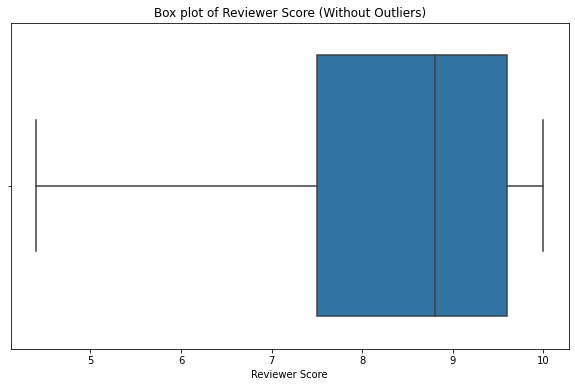

In [7]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = hotels_cleaned['Reviewer_Score'].quantile(0.25)
Q3 = hotels_cleaned['Reviewer_Score'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
hotels_new = hotels_cleaned.copy()
hotels_new = hotels_cleaned[(hotels_new['Reviewer_Score'] >= lower_bound) & (hotels_new['Reviewer_Score'] <= upper_bound)]

# Create a box plot for Reviewer_Score without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(hotels_new['Reviewer_Score'])
plt.title('Box plot of Reviewer Score (Without Outliers)')
plt.xlabel('Reviewer Score')
plt.show()

##Selecting Data

In [8]:
#Trimming the data for simplicity
hotels_new = hotels_cleaned[(hotels_cleaned['Review_Date'] >= '2015-08-04') & (hotels_cleaned['Review_Date'] <= '2017-08-03')]
hotels_new = hotels_new.copy()

#**Data Transformation**

In [9]:
#Converting variables to int typ which are supposed to be int.
hotels_new['days_since_review'] = hotels_new['days_since_review'].str.replace(r'\D', '').astype(int)

C:\Users\sachin\AppData\Local\Temp\ipykernel_15604\1286811500.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  hotels_new['days_since_review'] = hotels_new['days_since_review'].str.replace(r'\D', '').astype(int)


In [10]:
#Transforming the review nationality values into the encoded labels
encode=LabelEncoder()
hotels_new['Nationality'] = encode.fit_transform(hotels_new['Reviewer_Nationality'])

In [11]:
#Transforming the tag values into the encoded labels
le = LabelEncoder()
hotels_new['Tags'] = hotels_new['Tags'].apply(lambda x: ' '.join(x))
hotels_new['Tags_encoded'] = le.fit_transform(hotels_new['Tags'])

#**Data Mining**
##VADER Model

In [12]:
# Apply VADER to get sentiment scores
analyzer = SentimentIntensityAnalyzer()
hotels_new['negative_review_sentiment'] = hotels_new['Negative_Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
hotels_new['positive_review_sentiment'] = hotels_new['Positive_Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [13]:

# Convert VADER scores to sentiment labels
hotels_new['negative_review_label'] = hotels_new['negative_review_sentiment'].apply(lambda x: 'negative' if x < 0 else ('neutral' if x == 0 else 'positive'))
hotels_new['positive_review_label'] = hotels_new['positive_review_sentiment'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [14]:
# Determine overall sentiment and covert into label
def overall_sentiment(data):
    if (data['negative_review_sentiment'] + data['positive_review_sentiment']) < 0:
        return 'negative'
    elif (data['positive_review_sentiment'] + data['negative_review_sentiment']) > 0:
        return 'positive'
    else:
        return 'neutral'
hotels_new['overall_sentiment'] = hotels_new.apply(overall_sentiment, axis=1)

# Compound sentiment and covert into overall sentiment score
hotels_new['comp_sentiment'] = hotels_new['negative_review_sentiment'] + hotels_new['positive_review_sentiment']

# Determine overall sentiment and covert into extreme values
def sentiment_score(data_score):
    if (data_score['overall_sentiment'] == 'negative'):
        return -1
    elif (data_score['overall_sentiment'] == 'positive'):
        return 1
    else:
        return 0
hotels_new['sentiment_score'] = hotels_new.apply(sentiment_score, axis=1)

In [15]:
#Encoding the feature data
hotels_new['negative_label'] = LabelEncoder().fit_transform(hotels_new['negative_review_label'])
hotels_new['positive_label'] = LabelEncoder().fit_transform(hotels_new['positive_review_label'])

##Random Forest Classifier

In [16]:
# Define features and target
features = ['Nationality', 'Reviewer_Score', 'Tags_encoded', 'positive_label', 'negative_label', 'Average_Score']
X = hotels_new[features]
y = hotels_new['overall_sentiment']

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Train a Random Forest classifier and optimise hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [19]:
# Select the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Predict sentiment labels on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#**Pattern Evaluation**

In [30]:
# Analyse feature importances
feature_importances = best_rf_classifier.feature_importances_
feature_names = list(X_train.columns)
sorted_feature_importances = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Examine misclassified examples (optional)
misclassified = X_test[y_test != y_pred]

# Summarise performance and key takeaways
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

print('\nTop Feature Importances:')
for feature, importance in sorted_feature_importances[:6]:
    print(f'{feature}: {importance:.4f}')

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.78      0.85     23664
     neutral       1.00      0.98      0.99      8175
    positive       0.96      0.99      0.97    121902

    accuracy                           0.96    153741
   macro avg       0.97      0.92      0.94    153741
weighted avg       0.96      0.96      0.96    153741

Confusion Matrix:
 [[ 18559      0   5105]
 [    21   8051    103]
 [  1224      0 120678]]

Top Feature Importances:
positive_label: 0.5856
negative_label: 0.3144
Reviewer_Score: 0.0870
Average_Score: 0.0068
Tags_encoded: 0.0041
Nationality: 0.0022


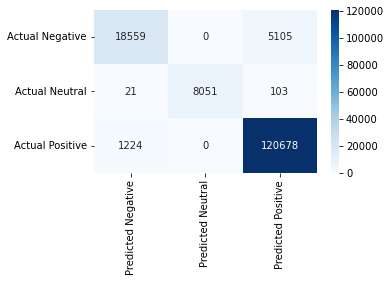

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Neutral', 'Actual Positive'])
plt.show()

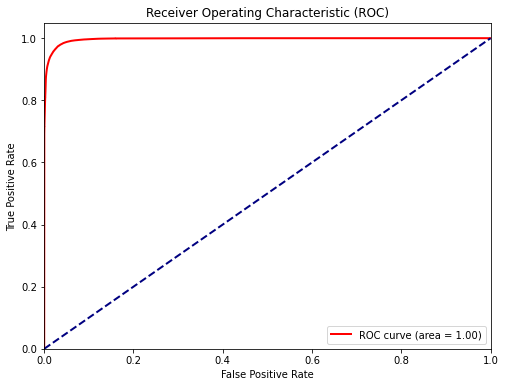

In [22]:
# Binarise the labels (convert labels to binary format)
y_test_binary = label_binarize(y_test, classes=['negative', 'neutral', 'positive'])
n_classes = y_test_binary.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], best_rf_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binary.ravel(), best_rf_classifier.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Replace 'RandomForestClassifier' with your chosen classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5  # You can adjust this number based on your preference

# Initialise stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores for each fold
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

# Calculate and print the mean and standard deviation of accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Standard Deviation: {std_accuracy:.4f}')

Fold 1: Accuracy = 0.9580
Fold 2: Accuracy = 0.9590
Fold 3: Accuracy = 0.9578
Fold 4: Accuracy = 0.9573
Fold 5: Accuracy = 0.9574
Mean Accuracy: 0.9579
Standard Deviation: 0.0006


#**Knowledge Presentation**

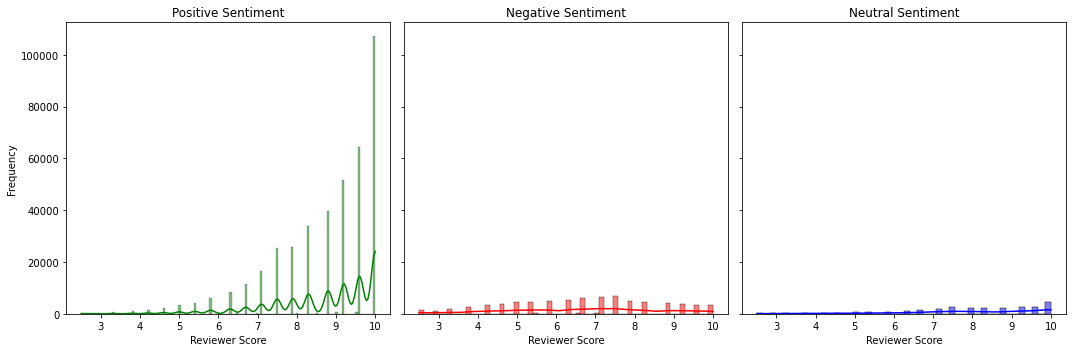

In [24]:
# Filter data for each sentiment (positive, negative, neutral)
positive_reviews = hotels_new[hotels_new['overall_sentiment'] == 'positive']
negative_reviews = hotels_new[hotels_new['overall_sentiment'] == 'negative']
neutral_reviews = hotels_new[hotels_new['overall_sentiment'] == 'neutral']

#Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for Positive Sentiment
sns.histplot(positive_reviews['Reviewer_Score'], kde=True, color='green', ax=axes[0])
axes[0].set_title('Positive Sentiment')
axes[0].set_xlabel('Reviewer Score')
axes[0].set_ylabel('Frequency')

# Plot for Negative Sentiment
sns.histplot(negative_reviews['Reviewer_Score'], kde=True, color='red', ax=axes[1])
axes[1].set_title('Negative Sentiment')
axes[1].set_xlabel('Reviewer Score')

# Plot for Neutral Sentiment
sns.histplot(neutral_reviews['Reviewer_Score'], kde=True, color='blue', ax=axes[2])
axes[2].set_title('Neutral Sentiment')
axes[2].set_xlabel('Reviewer Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 864x432 with 0 Axes>

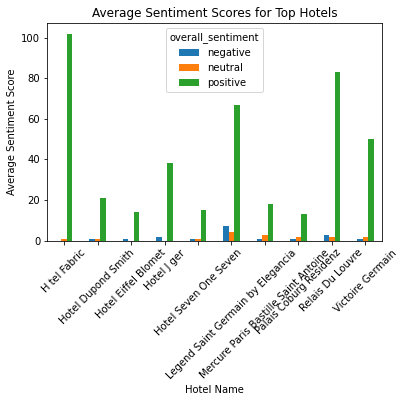

In [25]:
# Extract month and year from 'Review_Date'
hotels_new['Year_Month'] = hotels_new['Review_Date'].dt.to_period('M')

# Determine the number of hotels with the highest negative and positive sentiment scores
num_hotels = 5  # You can adjust this number as needed

# Get the top hotels with the highest negative sentiment scores
top_negative_hotels = hotels_new[hotels_new['comp_sentiment'] < 0].groupby('Hotel_Name')['comp_sentiment'].mean().nsmallest(num_hotels).index

# Get the top hotels with the highest positive sentiment scores
top_positive_hotels = hotels_new[hotels_new['comp_sentiment'] >= 0].groupby('Hotel_Name')['comp_sentiment'].mean().nlargest(num_hotels).index

# Filter the dataset for the top negative and positive hotels
filtered_hotels = hotels_new[hotels_new['Hotel_Name'].isin(top_negative_hotels) | hotels_new['Hotel_Name'].isin(top_positive_hotels)]

# Create a bar plot for the average sentiment scores of the top hotels
plt.figure(figsize=(12, 6))
bar_plot = filtered_hotels.groupby(['Hotel_Name', 'overall_sentiment'])['Year_Month'].count().unstack().plot(kind='bar')
plt.title('Average Sentiment Scores for Top Hotels')
plt.xlabel('Hotel Name')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

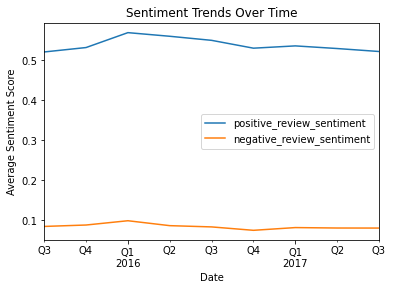

In [26]:
# Aggregate by time period
df_time = hotels_new.set_index('Review_Date').resample('Q').mean()[['positive_review_sentiment','negative_review_sentiment']]

# Plot trends
df_time.plot()
plt.title('Sentiment Trends Over Time')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Date')
plt.show()

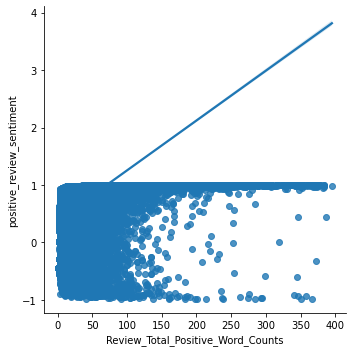

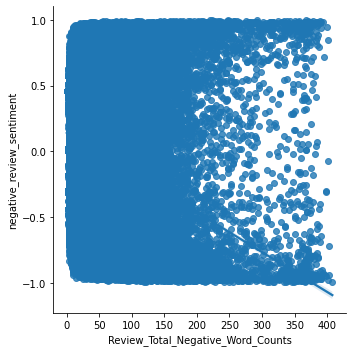

In [27]:
# Plot sentiment vs review length
sns.lmplot(x='Review_Total_Positive_Word_Counts', y='positive_review_sentiment', data=hotels_new)
sns.lmplot(x='Review_Total_Negative_Word_Counts', y='negative_review_sentiment', data=hotels_new)
plt.show()

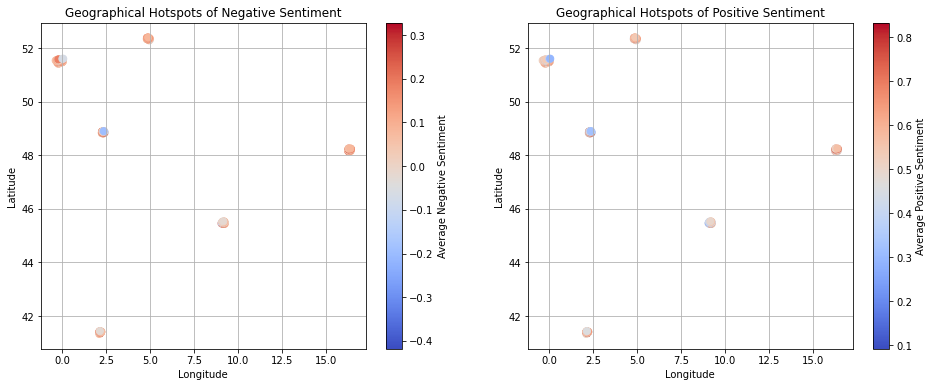


Latitude and Longitude of Highest Average Positive Sentiment:
Latitude: 48.8416787
Longitude: 2.3022862
Latitude and Longitude of Highest Average Negative Sentiment:
Latitude: 48.8629329
Longitude: 2.3723823


In [28]:
# Group data by latitude and longitude, and calculate average positive sentiment
geographical_neg_hotspots = hotels_new.groupby(['lat', 'lng'])['negative_review_sentiment'].mean().reset_index()
geographical_pos_hotspots = hotels_new.groupby(['lat', 'lng'])['positive_review_sentiment'].mean().reset_index()

# Create subplots for both negative and positive sentiment hotspots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot geographical hotspots for negative sentiment
axes[0].scatter(geographical_neg_hotspots['lng'], geographical_neg_hotspots['lat'], c=geographical_neg_hotspots['negative_review_sentiment'], cmap='coolwarm', s=50)
axes[0].set_title('Geographical Hotspots of Negative Sentiment')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True)
cbar = fig.colorbar(axes[0].collections[0], ax=axes[0], orientation='vertical')
cbar.set_label('Average Negative Sentiment')

# Plot geographical hotspots for positive sentiment
axes[1].scatter(geographical_pos_hotspots['lng'], geographical_pos_hotspots['lat'], c=geographical_pos_hotspots['positive_review_sentiment'], cmap='coolwarm', s=50)
axes[1].set_title('Geographical Hotspots of Positive Sentiment')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True)
cbar = fig.colorbar(axes[1].collections[0], ax=axes[1], orientation='vertical')
cbar.set_label('Average Positive Sentiment')

plt.show()

# Print latitude and longitude of the highest average positive and negative sentiment
highest_positive_sentiment = geographical_pos_hotspots.loc[geographical_pos_hotspots['positive_review_sentiment'].idxmax()]
print("\nLatitude and Longitude of Highest Average Positive Sentiment:")
print("Latitude:", highest_positive_sentiment['lat'])
print("Longitude:", highest_positive_sentiment['lng'])
highest_negative_sentiment = geographical_neg_hotspots.loc[geographical_neg_hotspots['negative_review_sentiment'].idxmax()]
print("Latitude and Longitude of Highest Average Negative Sentiment:")
print("Latitude:", highest_negative_sentiment['lat'])
print("Longitude:", highest_negative_sentiment['lng'])

# **Unit Testing**

In [29]:
# Selecting 5 random examples from the test set
test_cases = X_test.sample(n=5)

# Predict sentiment labels on the test set
y_pred_test = best_rf_classifier.predict(test_cases)

# Decode the encoded tags and nationality back to their original categorical values
decoded_tags = le.inverse_transform(test_cases['Tags_encoded'])
nationality = encode.inverse_transform(test_cases['Nationality'])

# Print the predicted sentiment labels and decoded tags for each test example
for i, (index, example) in enumerate(test_cases.iterrows()):
    print(f"Example {i+1}:")
    print("Features:\n", example)
    print("Nationality:", nationality[i])
    print("Tags:", decoded_tags[i])
    print("Predicted Sentiment:", y_pred_test[i])
    print()  # Add empty line for clarity

Example 1:
Features:
 Nationality          38.0
Reviewer_Score       10.0
Tags_encoded      18043.0
positive_label        2.0
negative_label        2.0
Average_Score         9.1
Name: 411711, dtype: float64
Nationality:  Canada 
Tags: [ '   L e i s u r e   t r i p   ' ,   '   C o u p l e   ' ,   '   D e l u x e   D o u b l e   o r   T w i n   R o o m   ' ,   '   S t a y e d   7   n i g h t s   ' ,   '   S u b m i t t e d   f r o m   a   m o b i l e   d e v i c e   ' ]
Predicted Sentiment: positive

Example 2:
Features:
 Nationality         214.0
Reviewer_Score        6.3
Tags_encoded      25534.0
positive_label        2.0
negative_label        1.0
Average_Score         7.5
Name: 423028, dtype: float64
Nationality:  United Kingdom 
Tags: [ '   L e i s u r e   t r i p   ' ,   '   C o u p l e   ' ,   '   S u p e r i o r   D o u b l e   R o o m   ' ,   '   S t a y e d   2   n i g h t s   ' ,   '   S u b m i t t e d   f r o m   a   m o b i l e   d e v i c e   ' ]
Predicted Sentiment: positi